In [3]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 6.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=cd4fdb291e908ec06b133db9853c9d456e25a69dc16a82430f250932c9465541
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [13]:
import numpy as np
import skfuzzy as fuzz  
from skfuzzy import control as ctrl

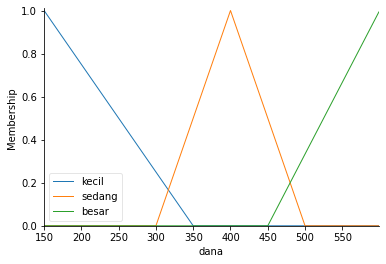

In [101]:
dana = ctrl.Antecedent(np.arange(150,600,1),"dana")
dana["kecil"] = fuzz.trimf(dana.universe,[150,150,350])
dana["sedang"] = fuzz.trimf(dana.universe,[300,400,500])
dana["besar"] = fuzz.trimf(dana.universe,[450,600,600])
dana.view();

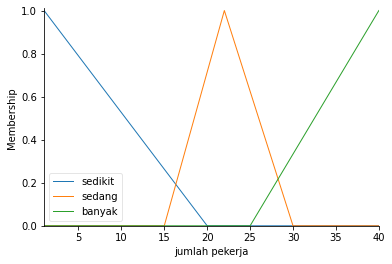

In [107]:
jumlah= ctrl.Antecedent(np.arange(1,41,1),"jumlah pekerja")
jumlah["sedikit"] = fuzz.trimf(jumlah.universe,[1,1,20])
jumlah["sedang"] = fuzz.trimf(jumlah.universe,[15,22,30])
jumlah["banyak"] = fuzz.trimf(jumlah.universe,[25,40,40])
jumlah.view();

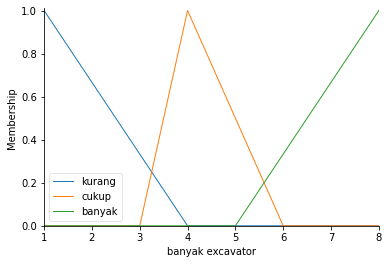

In [115]:
excavator= ctrl.Antecedent(np.arange(1,9,1),"banyak excavator")
excavator["kurang"] = fuzz.trimf(excavator.universe,[1,1,4])
excavator["cukup"] = fuzz.trimf(excavator.universe,[3,4,6])
excavator["banyak"] = fuzz.trimf(excavator.universe,[5,8,8])
excavator.view()

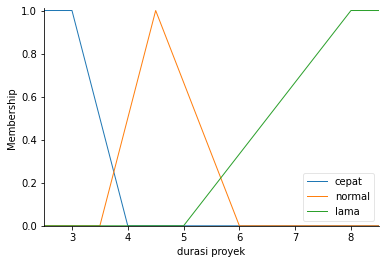

In [92]:
durasi= ctrl.Consequent(np.arange(2.5,9,0.5),"durasi proyek")
durasi["cepat"] = fuzz.trapmf(durasi.universe,[2.5,2.5,3,4])
durasi["normal"] = fuzz.trimf(durasi.universe,[3.5,4.5,6])
durasi["lama"] = fuzz.trapmf(durasi.universe,[5,8,9,9])
durasi.view()

In [116]:
rule1 = ctrl.Rule(dana['kecil'] | jumlah["sedikit"] | excavator['kurang'], durasi['lama'])
rule2 = ctrl.Rule(dana['kecil'] | jumlah["sedang"] | excavator['kurang'], durasi['lama'])
rule3 = ctrl.Rule(dana['sedang'] | jumlah["sedikit"] | excavator['cukup'], durasi['lama'])
rule4 = ctrl.Rule(dana['sedang'] | jumlah["sedang"] | excavator['cukup'], durasi['normal'])
rule5 = ctrl.Rule(dana['sedang'] | jumlah["banyak"] | excavator['banyak'], durasi['cepat'])
rule6 = ctrl.Rule(dana['besar'] | jumlah["sedikit"] | excavator['banyak'], durasi['normal'])
rule7 = ctrl.Rule(dana['besar'] | jumlah["sedang"] | excavator['banyak'], durasi['cepat'])
rule8 = ctrl.Rule(dana['besar'] | jumlah["banyak"] | excavator['banyak'], durasi['cepat'])
rule9 = ctrl.Rule(dana['besar'] | jumlah["sedang"] | excavator['cukup'], durasi['normal'])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f039d0f58d0>)

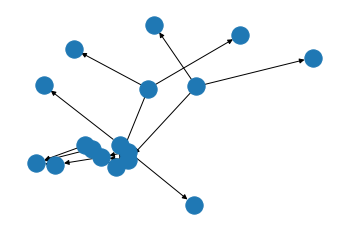

In [117]:
rule1.view()

In [121]:
durasi_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [123]:
final = ctrl.ControlSystemSimulation(durasi_ctrl)

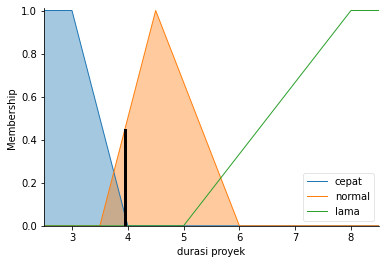

In [134]:
final.input["dana"] = 600
final.input['jumlah pekerja'] = 40
final.input["banyak excavator"] = 8

final.compute()
durasi.view(sim=final)


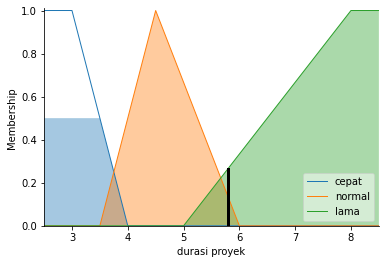

In [135]:
final.input["dana"] = 450
final.input['jumlah pekerja'] = 28
final.input["banyak excavator"] = 4

final.compute()
durasi.view(sim=final)  